<a href="https://colab.research.google.com/github/AngeHidalgo/Programacion_Aplicada/blob/main/Informe_Girasol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Integrantes
* Nicolas Felipe Macias Paz/20212005141 / Chasis
* Angela Juliana Hidalgo Caina/20212005082/Código
* Angie Gabriela Gallegos Vargas/20211005/Montaje
# Objetivo
Diseñar un codigo en Micropython que logre hacer girar un servomotor dependiendo de la impedacia dada por señales de luz con fotoresistencias imitandon el trabajo de los girasoles.
# Materiales

*   Raspberry pi pico W
*   Servomotor
*   2 Fotoresistencias
*   Protoboard
*   2 resistencias de 1kohmio
*   Jumpers

#Propuesta
La idea principal para desarrollar el objetivo es por medio de la rasperry y dos entradas de ADC con las cuales se busca leer la impedancia de entrada y compararla para indicarle al servo motor el sentido y la velocidad de giro.
#Problemas
El código propuesto inicialmente nos daba "Reboot" al compilar y ejecutar, al leer la impedancia de entrada dada por las fotoresistencias no se lograba leer correctamente. Posteriorente cuando se soluciono el problema de la lectura de las impedancias, no se lograba encontrar la forma para que hicieran mover el servomotor, ya que la centencia no se cumplia y el servomotor no realizaba el movimiento correspondiente a esta.
#Soluciones
Se hicieron modificaciones en el codigo y se cambiaron los pines de entrada del ADC, con esto ya se leía correctamente los valores de entrada de las fotorresistencias y para corroborarlo se graficaban los valores. Para que el motor se moviera conforme se deseaba lo que se hizo fue cambiar la centencia y meterla en un ciclo, adicionalmente se cambio la velocidad con la que este se movia.

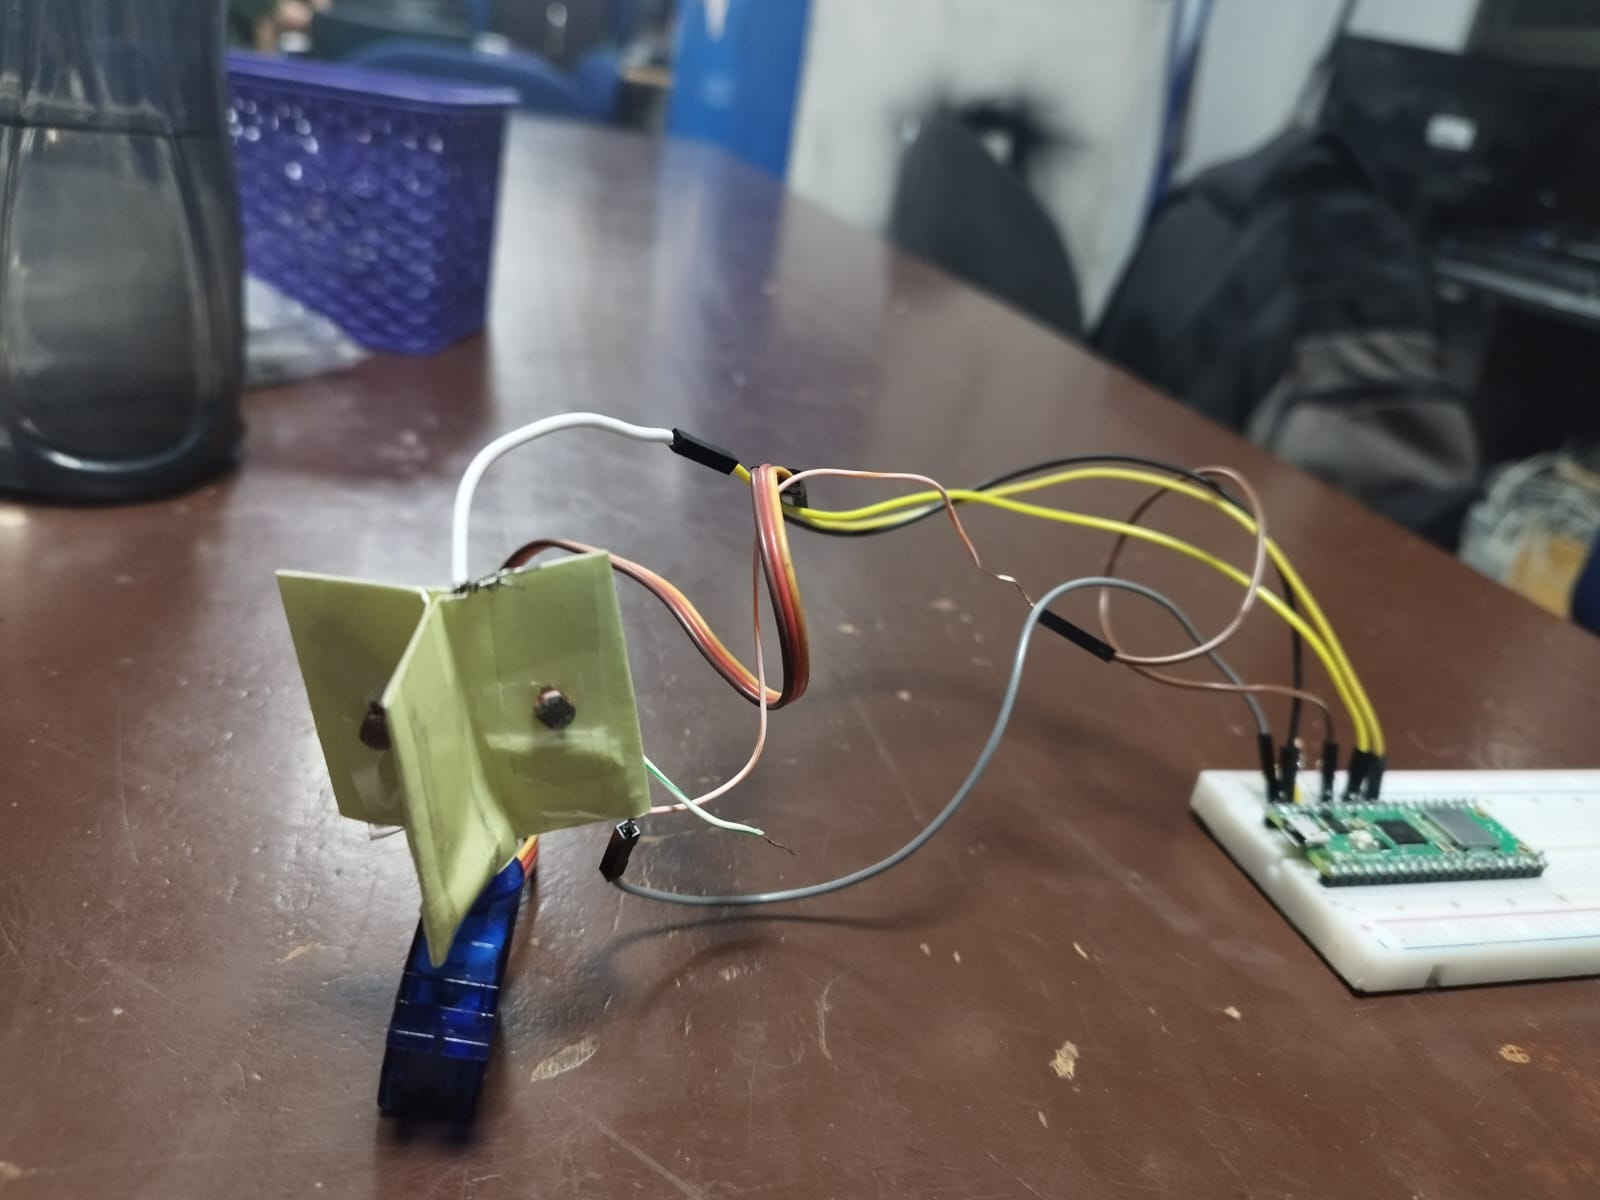

# Video de funcionamiento
https://youtu.be/ebhVCMAN_Wg

In [ ]:
from machine import Pin , PWM, Timer, ADC
import utime

pwm = PWM ( Pin ( 22 ) ) # GP16
pwm.freq (50)

fotoresistor1 = ADC(28)
fotoresistor2 = ADC(27)
posicion=5000
while True:
    luz1 = fotoresistor1.read_u16()
    luz2 = fotoresistor2.read_u16()

    diferencia_luz = luz2 - luz1
    posicion=posicion+(int(0.01*diferencia_luz))
    print(luz1,luz2,diferencia_luz,posicion)
    if posicion<8420:
        if posicion>1370:
            pwm.duty_u16(posicion)
    utime.sleep(0.1)
